In [330]:
import numpy as np
import pandas as pd
import keras

In [2]:
dict_words = pd.read_csv('Syllable_dictionary.txt', header = None)

In [3]:
#define a syllable dictionary with word keys and syllable count values 
syllables = {}
for i in range(len(dict_words)):
    row = dict_words[0][i]
    word = ''
    for j in range(len(row)):
        if(row[j]!=' '):
            word = word+row[j]
        else:
            syllable_list = []
            current_string = ''
            for j1 in range(j+1, len(row)):
                if(row[j1] == ' '):
                    syllable_list.append(current_string)
                    current_string = ''
                else:
                    current_string = current_string + row[j1]
                    if(j1 == len(row) - 1):
                        syllable_list.append(current_string)
                        
            syllable_list_2 = []     
            for s in syllable_list:
                if(len(s) == 1):
                    syllable_list_2.append(int(s))
                else:
                    syllable_list_2.append(int(s[1]))
            syllables[word] = syllable_list_2
            break
            

In [4]:
raw_data = pd.read_csv('shakespeare.txt',header=None,sep='\n')
raw_data.head()

,0
0,1
1,"From fairest creatures we desire increase,"
2,"That thereby beauty's rose might never die,"
3,"But as the riper should by time decease,"
4,His tender heir might bear his memory:


In [5]:
#Break up the entire text file into individual sonnets
sonnets = []
sonnet = ''
for i in range(1,len(raw_data)):
    if(len(raw_data[0][i].strip()) < 4):
        sonnets.append(sonnet)
        sonnet = ''
    elif(i == len(raw_data) - 1):
        sonnet = sonnet + raw_data[0][i] + '\n'
        sonnets.append(sonnet)
    else:
        sonnet = sonnet + raw_data[0][i] + '\n'
print(len(sonnets))

154


In [7]:
#Make all sonnets lowercase
for i, sonnet in enumerate(sonnets):
    sonnets[i] = sonnet.lower()

In [9]:
#Hard code in other symbols as words with zero syllables
syllables[','] = [0]
syllables['.'] = [0]
syllables['!'] = [0]
syllables['?'] = [0]
syllables[':'] = [0]
syllables[';'] = [0]

In [10]:
states = list(syllables.keys())

In [11]:
print(len(states))

3211


In [12]:
def sonnet_to_indices(s):
    '''Convert individual sonnets into their corresponding indices'''
    s = s.replace('\n', ' ').replace(',', ' ,').replace('.', ' .').replace(':', ' :').replace(';', ' ;').replace('!', ' !').replace('?', ' ?')
    results = list(filter(lambda e: e != '', s.split(' ')))
    for i, j in enumerate(results):
        results[i] = states.index(j)
    return results

In [690]:
#MegaString is just the entire corpus represented as a single string
megaString =''
for sonnet in sonnets:
    megaString = megaString + sonnet.lstrip('\n')
#print(megaString[0])
#print(megaString)

In [322]:
#Define a dictionary of all symbols used in the corpus, assigning numbers to each one 
allSymbols = {}
count = 0
for c in megaString.lower():
    if c not in allSymbols:
        allSymbols[c] = count
        count = count + 1

In [323]:
print(allSymbols)
print(len(allSymbols))

{'f': 0, 'r': 1, 'o': 2, 'm': 3, ' ': 4, 'a': 5, 'i': 6, 'e': 7, 's': 8, 't': 9, 'c': 10, 'u': 11, 'w': 12, 'd': 13, 'n': 14, ',': 15, '\n': 16, 'h': 17, 'b': 18, 'y': 19, "'": 20, 'g': 21, 'v': 22, 'p': 23, 'l': 24, ':': 25, '-': 26, 'k': 27, '.': 28, 'z': 29, ';': 30, 'x': 31, '?': 32, 'q': 33, 'j': 34, '(': 35, ')': 36, '!': 37}
38


In [574]:
#Convert the data into X and Y training matrices for the neural net, using a step size of stepSize to know how many 
#characters to skip as we iterate through the corpus
stepSize = 1
X = []
Y_raw = []
for i in range(int(len(megaString)/stepSize) -40):
    x_i = []
    y_i = []
    for j in range(40):
        x_i.append(allSymbols[megaString[stepSize*i+j]])
    y_i.append(allSymbols[megaString[stepSize*i+40]])
    X.append(x_i)
    Y_raw.append(y_i)
X = np.array(X)
Y_raw = np.array(Y_raw)
print(X)
print(Y_raw)

[[ 0  1  2 ...  7  5  8]
 [ 1  2  3 ...  5  8  7]
 [ 2  3  4 ...  8  7 15]
 ...
 [20  8  4 ... 24  2 22]
 [ 8  4  0 ...  2 22  7]
 [ 4  0  6 ... 22  7 28]]
[[ 7]
 [15]
 [16]
 ...
 [ 7]
 [28]
 [16]]


In [575]:
#Normalize X and one-hot-encode Y
X = np.reshape(X, (len(X), 40, 1))
X = X / float(len(allSymbols))
Y = keras.utils.np_utils.to_categorical(Y_raw)

In [576]:
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [577]:
#Define the neural net with 100 hidden layers and a batch size of 32
lstm_out = 100
batch_size = 32

model = keras.Sequential()
model.add(keras.layers.LSTM(lstm_out,input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(len(allSymbols),activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
models.append(model)
print(model.summary())

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_46 (Dense)             (None, 38)                3838      
Total params: 44,638
Trainable params: 44,638
Non-trainable params: 0
_________________________________________________________________
None


In [578]:

#np.transpose(np.transpose(Y)[0])

In [579]:
model.fit(X,Y,batch_size =batch_size, epochs = 500,  verbose = 5)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [338]:
#Define an inverse dicitonary mapping numbers back to their corresponding symbol
int_to_symbol = {v: k for k, v in allSymbols.items()}
print(int_to_symbol)

{0: 'f', 1: 'r', 2: 'o', 3: 'm', 4: ' ', 5: 'a', 6: 'i', 7: 'e', 8: 's', 9: 't', 10: 'c', 11: 'u', 12: 'w', 13: 'd', 14: 'n', 15: ',', 16: '\n', 17: 'h', 18: 'b', 19: 'y', 20: "'", 21: 'g', 22: 'v', 23: 'p', 24: 'l', 25: ':', 26: '-', 27: 'k', 28: '.', 29: 'z', 30: ';', 31: 'x', 32: '?', 33: 'q', 34: 'j', 35: '(', 36: ')', 37: '!'}


In [569]:
#Update the "current" string we are using for prediction to predict the next character
def updateCurrent(current,indices,stepSize):
    for i in range(len(current)-stepSize):
        current[i] = current[i+stepSize]
    for j in range(len(indices)):
        current[i+j+1] = indices[j]
    return(current)

In [570]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    # from keras website
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [571]:
updateCurrent([1,2,3,4],[5],1)

[2, 3, 4, 5]

In [701]:
#Sample the probability distribution repeatedly in order to generate one character at a time
numChars = 1000
result1 = 'Shall I compare thee to a summer\'s day?\n'
result2 = 'Shall I compare thee to a summer\'s day?\n'
result3 = 'Shall I compare thee to a summer\'s day?\n'
current1 = np.zeros(40)
current2 = np.zeros(40)
current3 = np.zeros(40)
for i in range(40):
    current1[i] = allSymbols[result[i].lower()]
    current2[i] = allSymbols[result[i].lower()]
    current3[i] = allSymbols[result[i].lower()]
for i in range(numChars):
    x1 = np.reshape(current1, (1, len(current1), 1))
    x1 = x1 / float(len(allSymbols))
    x2 = np.reshape(current2, (1, len(current2), 1))
    x2 = x2 / float(len(allSymbols))
    x3 = np.reshape(current3, (1, len(current3), 1))
    x3 = x3 / float(len(allSymbols))
    indices1 = np.zeros(stepSize)
    indices2 = np.zeros(stepSize)
    indices3 = np.zeros(stepSize)
    for j in range(stepSize):
        prediction1 = model.predict(x1, verbose=0)
        indices1[j] = sample(prediction1[0],temperature=1.5)
        result1 = result1 + int_to_symbol[indices1[j]]
        
        prediction2 = model.predict(x2, verbose=0)
        indices2[j] = sample(prediction2[0],temperature=.75)
        result2 = result2 + int_to_symbol[indices2[j]]
        
        prediction3 = model.predict(x3, verbose=0)
        indices3[j] = sample(prediction3[0],temperature=.25)
        result3 = result3 + int_to_symbol[indices3[j]]
    
    current1 = updateCurrent(current1,indices1,stepSize)
    current2 = updateCurrent(current2,indices2,stepSize)
    current3 = updateCurrent(current3,indices3,stepSize)

In [700]:
#Results of the above process
print('Temperature = 1.5')
print(result1)
print('')
print('Temperature = .75')
print(result2)
print('')
print('Temperature = .25')
print(result3)

Temperature = 1.5
Shall I compare thee to a summer's day?
sye wotd iemv?ool of  ehy alhos ecge  .u,:bef asd thet th'th nhsfowgh sirdrid sikv loite.,fe rryldcsnelayougathe cikc,
aswpefiw sa gloiiw ehas hoea ndatim,iai ane tiec,
 obyss kies iyd hid-sn houhwspiv, cen toe ibc rvefendfowldyith obowurw'w yedtu ffrdekidoudkekliou
  ftf,v?yo' hitg all tpeec,
thet heluvers oed, ngabhy mf docc jneit wpere,
ti a'dia at ytsayt pus' ahant e'mliys lemteiv,
uha  ecuin toehsc ehille illeet shaets, gech ayc,
  sewt' gave dtch o tgerffmwlbid beaelowdre wryn

o swcrid ihl mycj of mrre,ir'h,ef ed thesg tvy bacost piklssxes iw dheadascill, fs eheh samorempacewrns oemasrsh lea,,r tmw.mchteettgy eposl, dure ou uryl aedad:.tben, fanleebg,hyoryn and mn meet nenkegd noss, naseivts to etwhomthsshistfodpy an eomewt dcycrry aempend

suerr bet taptfefu' pars  theikfdd ofyenisw raghs:
whure cr ry tuape me lgaw s ma utrase-pwie ooy an,,f iraresopd an fyaan? ahe cht' nokn',wpere co vidgh mf yiabt axilssd aadle oint

s

In [696]:
2+2

4

In [588]:
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

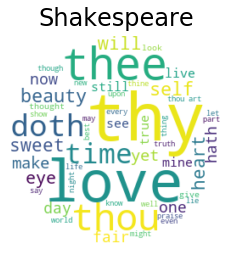

In [592]:
#Running the visualizations from last week's set (i.e., wordclouds)
wordcloud = text_to_wordcloud(megaString, title='Shakespeare')

In [677]:
import re
def parse_observations_2(text):
    #Convert text to dataset. Slight modification over the function in HMM_helper.py in order to account for how
    #I pass in the "megaString", to make sure we are breaking up each sequence to be a sonnet and not a line.
    lines_0 = [line.split() for line in text.split('\n') if line.split()]
    
    lines = []
    lineCount = 0
    sonnetCount = 0
    sonnet = []
    for line in lines_0:
        for i in range(len(line)):
            sonnet.append(line[i])
            
        if(lineCount == 13 and (sonnetCount != 98 and sonnetCount != 125)):
            lineCount = 0
            lines.append(sonnet)
            sonnet = []
            sonnetCount = sonnetCount + 1
        elif(lineCount == 14 and sonnetCount == 98):
            lineCount = 0
            lines.append(sonnet)
            sonnet = []
            sonnetCount = sonnetCount + 1
        elif(lineCount == 11 and sonnetCount == 125):
            lineCount = 0
            lines.append(sonnet)
            sonnet = []
            sonnetCount = sonnetCount + 1
            
        else:
            lineCount = lineCount + 1

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []
        
        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [686]:
#From here it's basically the same visualization code from last week.
obs, obs_map = parse_observations_2(megaString)
hmm8 = unsupervised_HMM(obs, 10, 100)

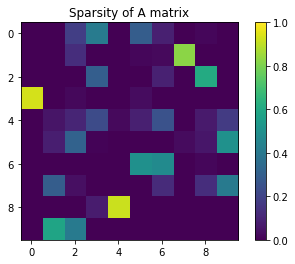

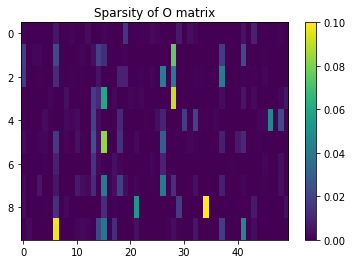

In [687]:
visualize_sparsities(hmm8, O_max_cols=50)

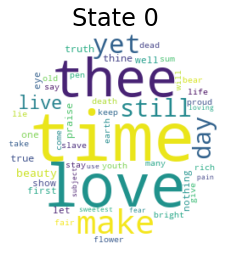

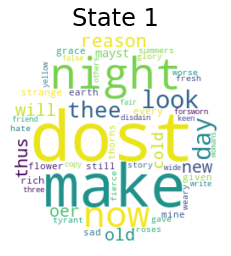

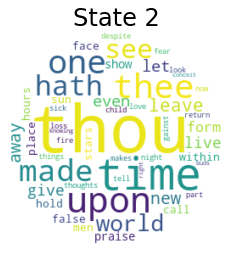

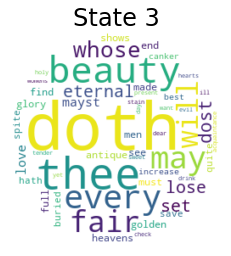

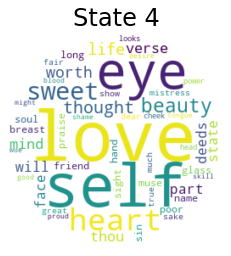

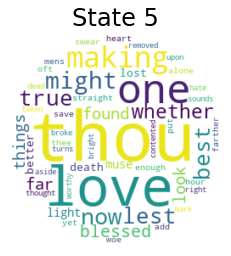

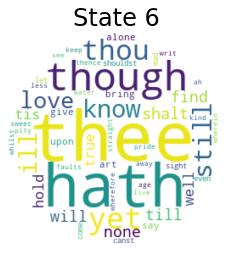

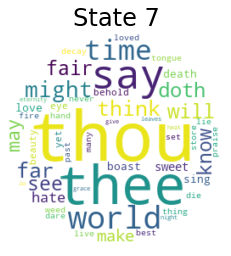

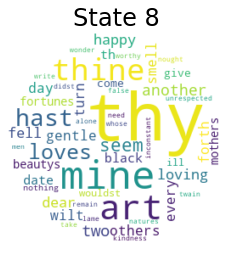

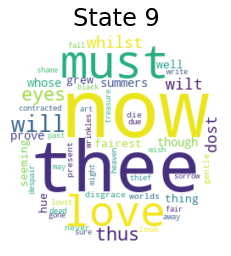

In [688]:
wordclouds = states_to_wordclouds(hmm8, obs_map)


Animating...


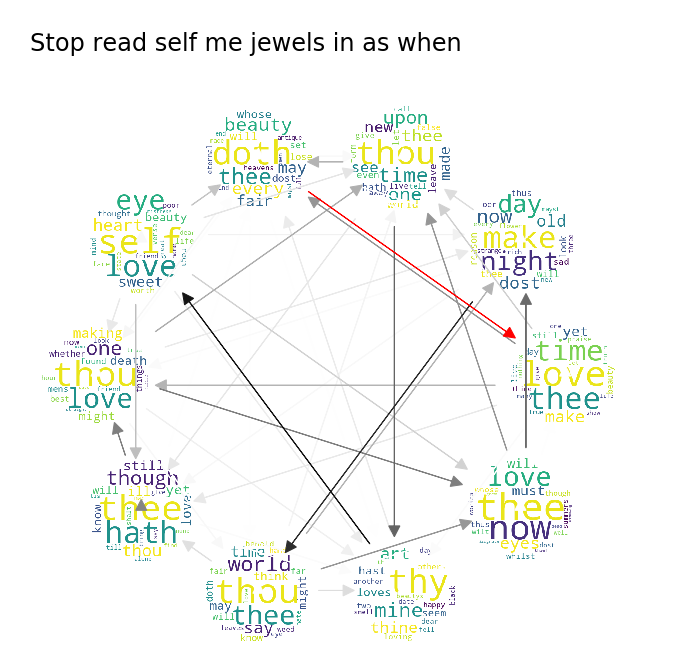

In [689]:
from IPython.display import HTML
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())